In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
print("IMPORTING LIBRARIES DONE")

IMPORTING LIBRARIES DONE


In [2]:
#importing Dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Dataset Imported!")

Dataset Imported!


In [3]:
#reading Dataset 
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# it gives the information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# describe Will shows min, max, std, count, mean of dataset 
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.shape

(25, 2)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

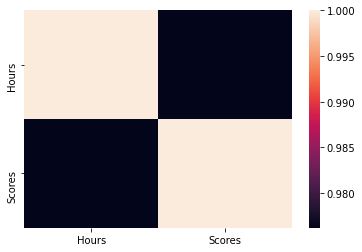

In [7]:
CM = dataset.corr()
print(CM)
sn.heatmap(CM)

<Figure size 1440x360 with 0 Axes>

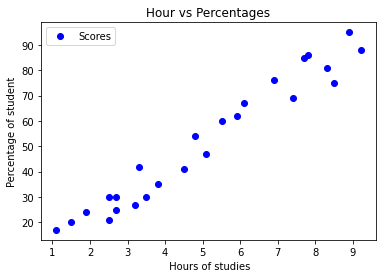

In [8]:
# Data Visualization
# Visualization using matplotlib
fig = plt.figure(figsize = (20, 5))
x='Hours'
y="Scores"

dataset.plot (x,y, style='o',c='b', marker ="o")
plt.xlabel(' Hours of studies')
plt.ylabel('Percentage of student')
plt.title('Hour vs Percentages') 
plt.show()

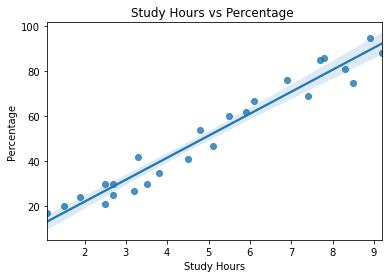

In [9]:
#visualization using seaborn
sn.regplot(x=dataset['Hours'], y=dataset['Scores'])
plt.title('Study Hours vs Percentage ')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [10]:
# Preparing Dataset for Predictions
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print("X is : ",X)
print("Y is : ",Y)

X is :  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y is :  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [11]:
# Splitting Dataset into Train and test data
from sklearn.model_selection import train_test_split

In [12]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),Y_train)
print("Model Trained Successfully !")

Model Trained Successfully !


In [14]:
#equation is Y=mX+c
#X = input
#Y = output
#m = slop of line
#c = intercep

# find regression line values
Line = regressor.coef_ * X + regressor.intercept_
print(Line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


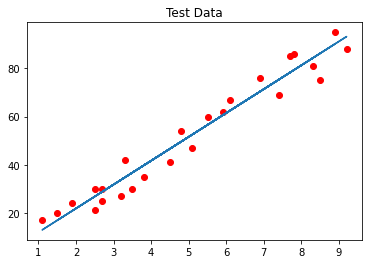

In [15]:
# plotting for the test data
plt.scatter(X,Y,color='red')
plt.plot(X,Line)
plt.title('Test Data')
plt.show()

In [16]:
print('x_test',x_test)
print('y_test',y_test)

x_test [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_test [20 27 69 30 62]


In [17]:
y_pred = regressor.predict(x_test)
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [18]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual' : y_test,'Predicted': y_pred})
compare.head(3)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018


In [19]:
# Find Accuracy of Model
from sklearn import metrics
ms = metrics.mean_squared_error(y_test,y_pred)
print('Mean squared error :: ',ms)
Absolute = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute error :: ',Absolute)
rms = np.sqrt(ms)
print('Root Mean squared error :: ',rms)
r_2 = metrics.r2_score(y_test,y_pred)
print('R_2 :: ',r_2)

Mean squared error ::  21.5987693072174
Mean Absolute error ::  4.183859899002975
Root Mean squared error ::  4.6474476121003665
R_2 ::  0.9454906892105356


In [20]:
# predicted score if a student studies for 9.25 hrs/ day
Hours = 9.25
prediction = regressor.predict([[Hours]])
print('No of Hours : ',Hours)
print('Predicted Score : ',prediction[0])

No of Hours :  9.25
Predicted Score :  93.69173248737538
